<a href="https://colab.research.google.com/github/jiw3026/SML/blob/main/dacon_%EB%94%B0%EB%A6%89%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/dacon/train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/dacon/test.csv')

In [ ]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [ ]:
train_x=train.drop(['count'], axis=1)
train_y=train['count']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [ ]:
pred=model.predict(test)

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/dacon/submission.csv')

In [ ]:
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [ ]:
submission['count']=pred

In [ ]:
submission

,id,count
0,0,94.39
1,1,230.04
2,2,82.36
3,4,28.80
4,5,59.78
...,...,...
710,2148,54.54
711,2149,64.66
712,2165,121.91
713,2166,152.96


In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

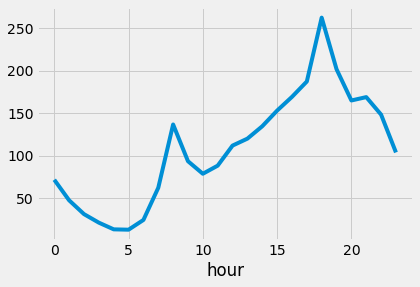

In [ ]:
train.groupby(['hour'])['count'].mean().plot()

Text(16, 150, 'leave work')

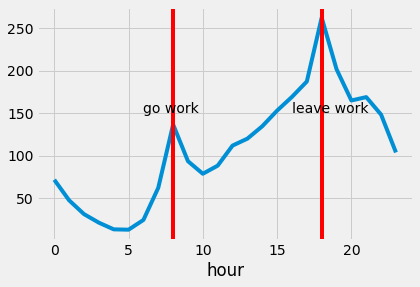

In [ ]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6,150,'go work')
plt.text(16,150,'leave work')

In [ ]:
train.shape

(1459, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  715 non-null    float64
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       715 non-null    float64
 6   hour_bef_visibility     715 non-null    float64
 7   hour_bef_ozone          715 non-null    float64
 8   hour_bef_pm10           715 non-null    float64
 9   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [ ]:
test.shape

(715, 10)

In [ ]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.694517,0.031528,2.463742,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.271990,0.174801,1.387657,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
train.quantile([0.25,0,0.75])

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0.25,555.5,5.5,12.80,0.0,1.4,36.0,877.5,0.022,33.0,19.0,37.0
0.00,3.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.0
0.75,1651.0,17.5,20.05,0.0,3.4,68.5,1994.0,0.051,68.0,36.0,150.0


In [ ]:
def get_outlier(x):
  Q1, Q3 = x.quantile([0.25,0.75])
  IQR = Q3-Q1
  upper_bound = Q3+1.5*IQR
  lower_bound = Q1-1.5*IQR
  outliers=x[(x>upper_bound)|(x<lower_bound)]
  return str(round(100*len(outliers)/len(x),1))+'%'

print(train.apply(get_outlier))

id                        0.0%
hour                      0.0%
hour_bef_temperature      0.1%
hour_bef_precipitation    3.2%
hour_bef_windspeed        0.6%
hour_bef_humidity         0.0%
hour_bef_visibility       0.0%
hour_bef_ozone            0.7%
hour_bef_pm10             3.6%
hour_bef_pm2.5            4.7%
count                     1.6%
dtype: object


In [ ]:
col_num=['id','hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']
col_y=['count']

In [ ]:
x_train=train.loc[:,['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']]

In [ ]:
x_train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


In [ ]:
y_train=train.loc[:,'count']

In [ ]:
y_train

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1459, dtype: float64

In [ ]:
from sklearn.svm import SVR
SVM_model=SVR()
SVM_model.fit(x_train,y_train)

SVR()

In [ ]:
x_test=test.loc[:,['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']]

In [ ]:
y_pred_svm=SVM_model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred_svm,squared=False)

79.9578278143794